# Age Detector
An age detector built using CNN model

## Data Preprocessing

In [26]:
import os
import cv2
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split

In [27]:
# Define paths
folder_path = 'imdb_crop' 
files = os.listdir(folder_path)

In [28]:
# Prepare data containers
ages = []
images = []
current_year = datetime.now().year

In [30]:
# Function to extract birth year from the filename
def extract_birth_year(filename):
    parts = filename.split('_')
    for part in parts:
        if '-' in part and len(part.split('-')[0]) == 4:
            return int(part.split('-')[0])
    return None

In [31]:
# Process files
for fle in files:
    birth_year = extract_birth_year(fle)
    if birth_year:
        age = current_year - birth_year
        ages.append(age)
        
        total = os.path.join(folder_path, fle)
        print(total)
        
        image = cv2.imread(total)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (48, 48))
            images.append(image)
        else:
            print(f"Skipping file due to image read error: {fle}")
    else:
        print(f"Skipping file with unexpected format: {fle}")

imdb_crop\nm0000001_rm124825600_1899-5-10_1968.jpg
imdb_crop\nm0000001_rm3343756032_1899-5-10_1970.jpg
imdb_crop\nm0000001_rm577153792_1899-5-10_1968.jpg
imdb_crop\nm0000001_rm946909184_1899-5-10_1968.jpg
imdb_crop\nm0000001_rm980463616_1899-5-10_1968.jpg
imdb_crop\nm0000002_rm1075631616_1924-9-16_1991.jpg
imdb_crop\nm0000002_rm1346607872_1924-9-16_2004.jpg
imdb_crop\nm0000002_rm1363385088_1924-9-16_2004.jpg
imdb_crop\nm0000002_rm1411175936_1924-9-16_1991.jpg
imdb_crop\nm0000002_rm1447271168_1924-9-16_2004.jpg
imdb_crop\nm0000002_rm1624085760_1924-9-16_2008.jpg
imdb_crop\nm0000002_rm1646056960_1924-9-16_1991.jpg
imdb_crop\nm0000002_rm221957120_1924-9-16_1974.jpg
imdb_crop\nm0000002_rm2287049216_1924-9-16_2007.jpg
imdb_crop\nm0000002_rm238734336_1924-9-16_1974.jpg
imdb_crop\nm0000002_rm2585828096_1924-9-16_2006.jpg
imdb_crop\nm0000002_rm2602605312_1924-9-16_2006.jpg
imdb_crop\nm0000002_rm2619382528_1924-9-16_2006.jpg
imdb_crop\nm0000002_rm2769394176_1924-9-16_2006.jpg
imdb_crop\nm000000

In [32]:
# Convert lists to numpy arrays
ages = np.array(ages)
images = np.array(images)

In [33]:
# Normalize images
images = images / 255.0

In [34]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, ages, test_size=0.2, random_state=42)

## Build the CNN Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [36]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Single output for age regression
])

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [38]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

## Train the Model

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
729/729 [==============================] - 45s 60ms/step - loss: 312.6526 - mae: 13.7978 - val_loss: 221.1804 - val_mae: 11.8697
Epoch 2/50
729/729 [==============================] - 40s 55ms/step - loss: 260.1279 - mae: 12.7404 - val_loss: 219.9097 - val_mae: 11.9203
Epoch 3/50
729/729 [==============================] - 43s 59ms/step - loss: 256.6056 - mae: 12.6636 - val_loss: 217.1915 - val_mae: 11.3900
Epoch 4/50
729/729 [==============================] - 42s 58ms/step - loss: 247.8792 - mae: 12.4001 - val_loss: 216.9990 - val_mae: 11.2924
Epoch 5/50
729/729 [==============================] - 42s 58ms/step - loss: 244.8794 - mae: 12.2881 - val_loss: 207.8295 - val_mae: 11.6245
Epoch 6/50
729/729 [==============================] - 43s 58ms/step - loss: 239.4850 - mae: 12.1516 - val_loss: 199.3951 - val_mae: 11.2137
Epoch 7/50
729/729 [==============================] - 44s 60ms/step - loss: 233.9795 - mae: 12.0094 - val_loss: 200.3131 - val_mae: 11.1563
Epoch 8/50
729/729 [

## Evaluate and Save the Model

In [40]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_val, y_val)
print(f'Test MAE: {test_mae}')

183/183 [==============================] - 3s 14ms/step - loss: 251.0898 - mae: 12.1166
Test MAE: 12.116569519042969


In [41]:
# Save the model
model.save('age_prediction_model.h5')

## Code for Testing Age Prediction on New Images

In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [63]:
# Load the saved model
model = tf.keras.models.load_model('age_prediction_model.h5')

In [64]:
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping file due to image read error: {image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (48, 48))
        image = image / 255.0
        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [65]:
# Define function to test images
def test_image(image_path, model):
    image = preprocess_image(image_path)
    if image is not None:
        plt.imshow(image)
        plt.show()
        
        image_test = np.expand_dims(image, axis=0)  # Add batch dimension
        pred_l = model.predict(image_test)
        age = int(np.round(pred_l[0][0]))
        
        print("Predicted Age is " + str(age))

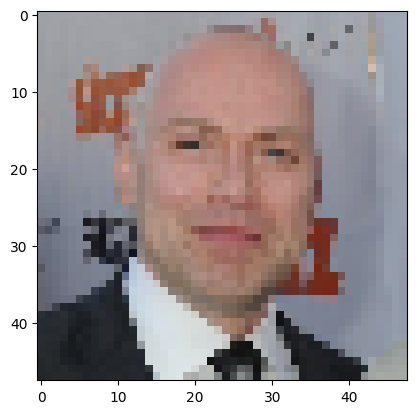

1/1 [==============================] - 0s 68ms/step
Predicted Age is 53


In [66]:
# Example usage: Test a single image
test_image_path = 'nm0000018_rm1465890048_1916-12-9_2010.jpg'
test_image(test_image_path, model)

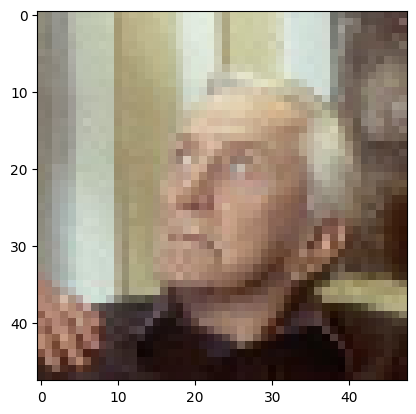

1/1 [==============================] - 0s 19ms/step
Predicted Age is 50


In [67]:
test_image_path = 'nm0000018_rm1953217024_1916-12-9_2003.jpg'
test_image(test_image_path, model)

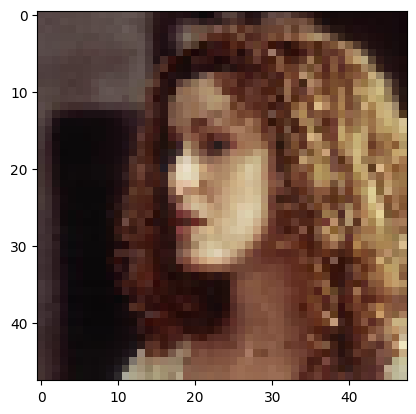

1/1 [==============================] - 0s 37ms/step
Predicted Age is 41


In [68]:
test_image_path = 'nm0000018_rm2070657536_1916-12-9_2003.jpg'
test_image(test_image_path, model)